In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

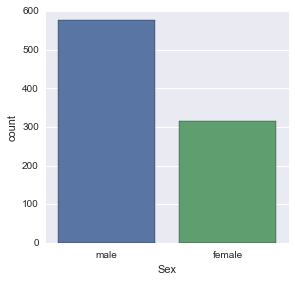

In [6]:
sns.factorplot('Sex',data=titanic_df,kind= 'count')

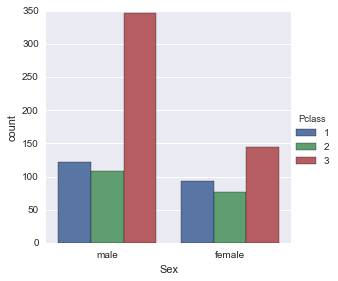

In [7]:
sns.factorplot('Sex',data=titanic_df,hue ='Pclass', kind='count')

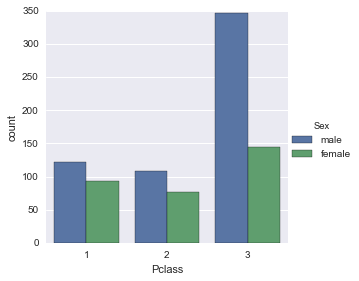

In [8]:
sns.factorplot('Pclass',data=titanic_df,hue ='Sex', kind='count')

In [9]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


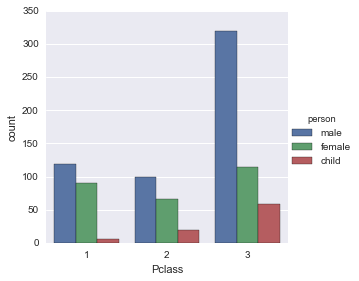

In [12]:
sns.factorplot('Pclass',data=titanic_df, hue='person',kind = 'count')

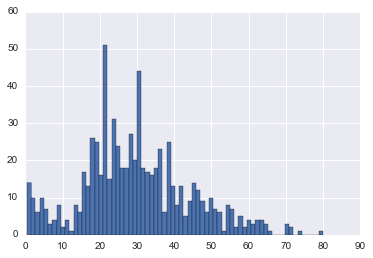

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

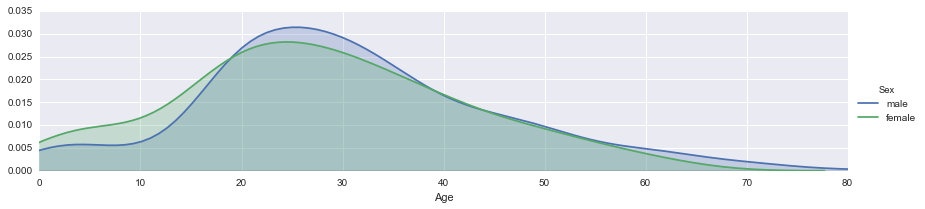

In [16]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

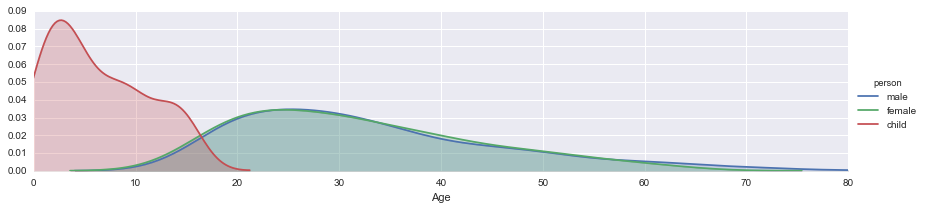

In [17]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,oldest))
fig.add_legend()

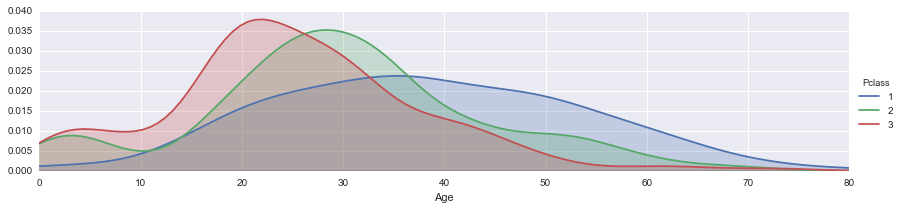

In [18]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest))
fig.add_legend()

In [19]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

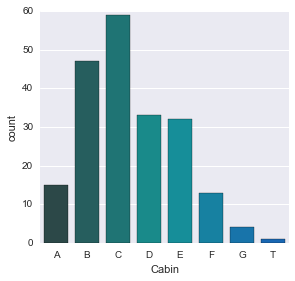

In [20]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df, palette ='winter_d', order=list('ABCDEFGT'),kind = 'count')

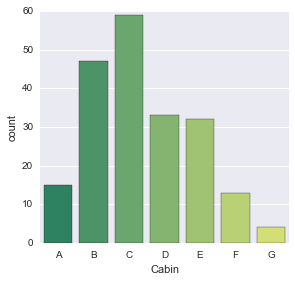

In [21]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data = cabin_df,palette='summer',kind='count',order=list('ABCDEFG'))

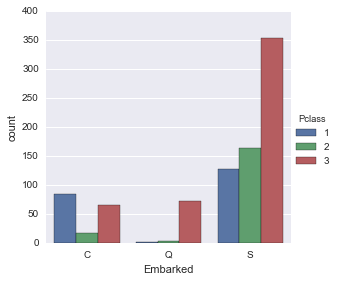

In [22]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass', order = ['C','Q','S'])

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [24]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [25]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/whasegaw/Desktop/Python/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


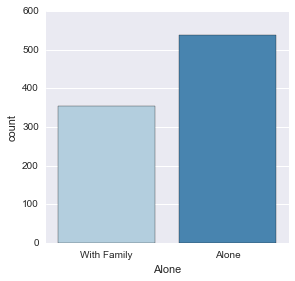

In [26]:
sns.factorplot('Alone', data=titanic_df, kind= 'count',palette = 'Blues')

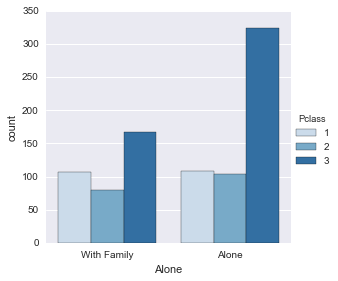

In [27]:
sns.factorplot('Alone', data=titanic_df, hue='Pclass', kind= 'count',palette = 'Blues')

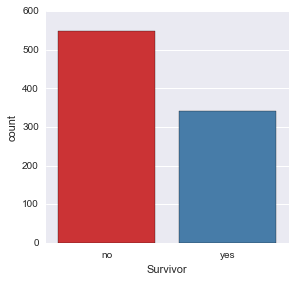

In [28]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data = titanic_df, kind = 'count',palette = 'Set1')

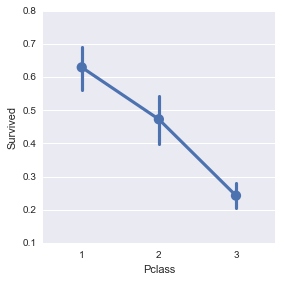

In [29]:
sns.factorplot('Pclass','Survived',data = titanic_df)

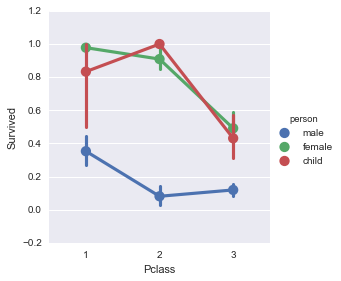

In [30]:
sns.factorplot('Pclass','Survived',hue= 'person', data= titanic_df)

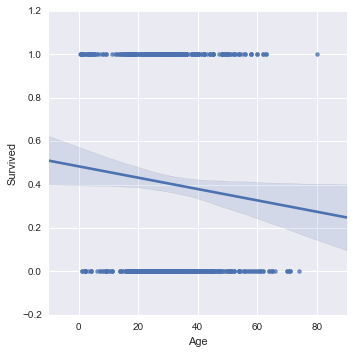

In [31]:
sns.lmplot('Age','Survived',data=titanic_df)

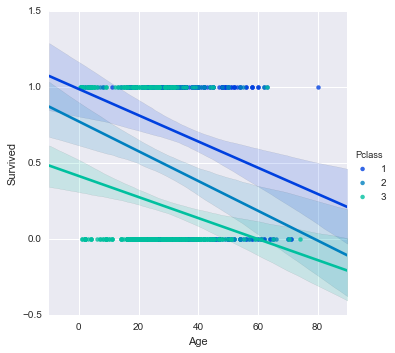

In [32]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

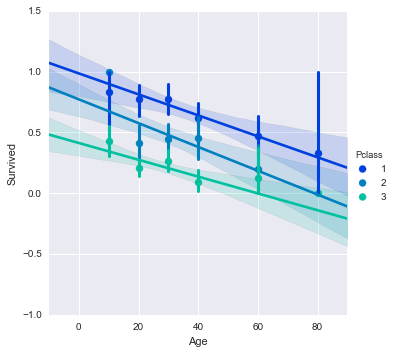

In [33]:
generations = [10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue= 'Pclass', data = titanic_df, palette = 'winter',x_bins= generations)

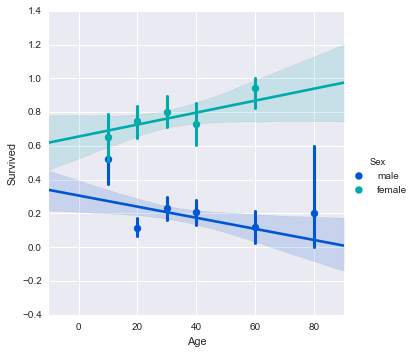

In [34]:
sns.lmplot('Age','Survived',hue= 'Sex',data= titanic_df, palette = 'winter',x_bins =  generations)

In [35]:
def decklevel(cabin):
    for level in cabin:
        return str(level)[0]
    
titanic_df['Deck'] = titanic_df[['Cabin']].apply(decklevel,axis= 1)

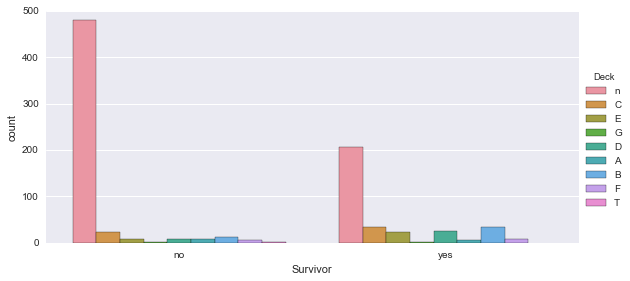

In [36]:
sns.factorplot('Survivor',hue= 'Deck',kind= 'count',data= titanic_df,aspect = 2)

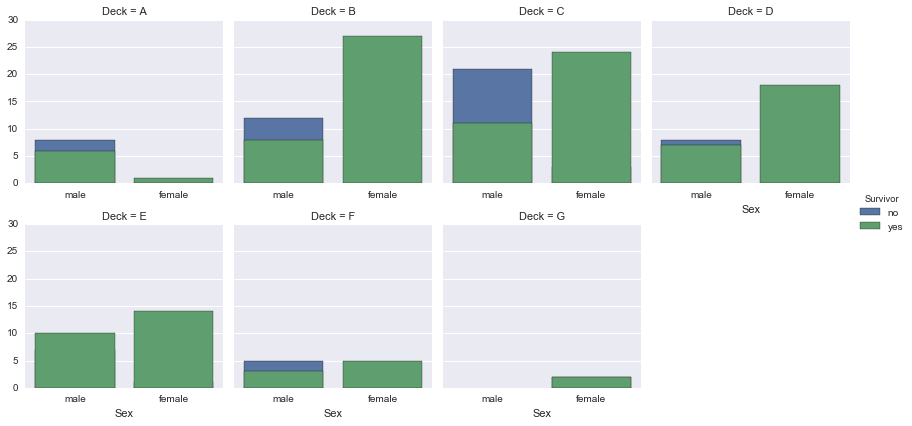

In [37]:
fig = sns.FacetGrid(titanic_df, col = 'Deck',col_order=list('ABCDEFG'),hue = 'Survivor',col_wrap = 4,sharex=False)
fig.map(sns.countplot, 'Sex',order=('male','female'))
fig.add_legend()

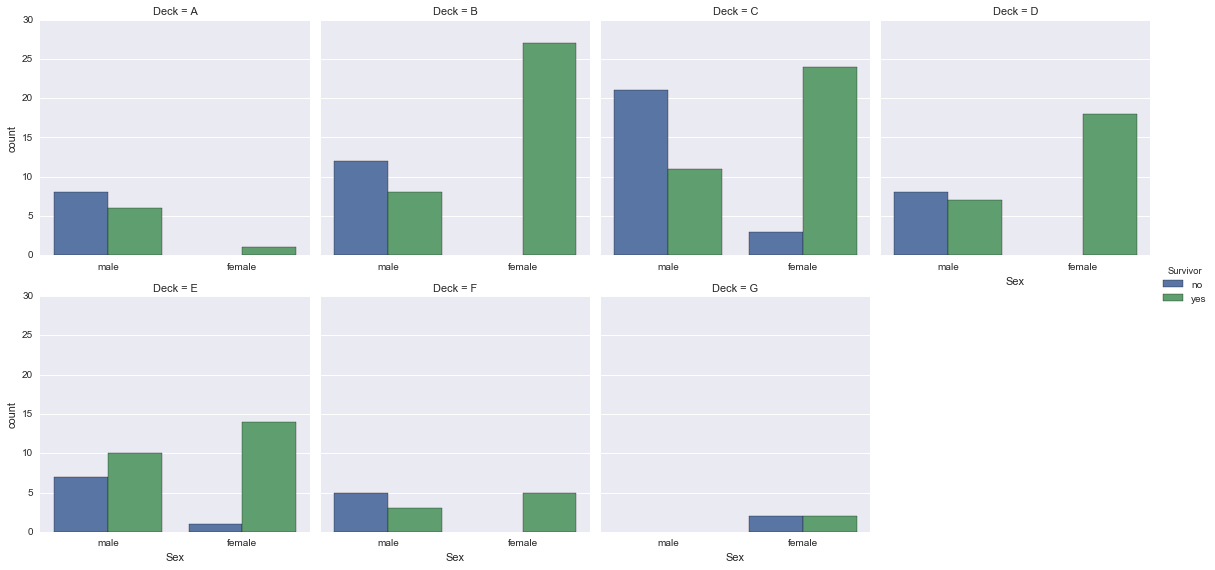

In [38]:
sns.factorplot(x='Sex',col='Deck',hue= 'Survivor',data=titanic_df,kind='count',col_order= list('ABCDEFG'),col_wrap=4,sharex=False)

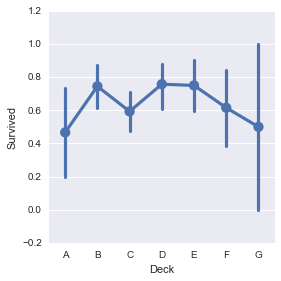

In [39]:
sns.factorplot('Deck','Survived',data= titanic_df,order= list('ABCDEFG'))

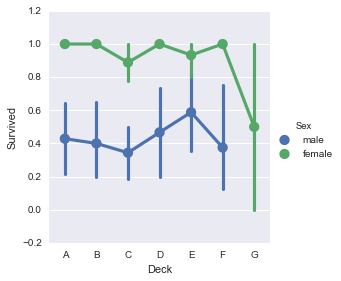

In [40]:
sns.factorplot('Deck','Survived',hue= 'Sex',data= titanic_df,order= list('ABCDEFG'))


In [41]:
titanic_df['Family'] = titanic_df.SibSp + titanic_df.Parch

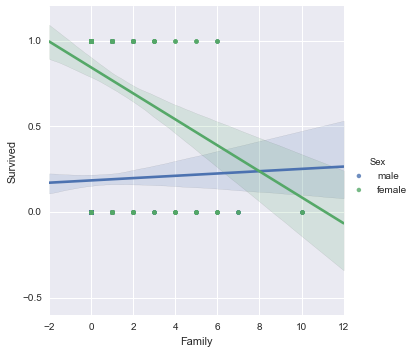

In [42]:
sns.lmplot('Family','Survived', hue='Sex', data = titanic_df)